## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [55]:
# Import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [194]:
# Import files into Jupyter notebook

bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv') # Mustafa

imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv') # Andy
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv') # Mustafa
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') # Andy
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv') # Mustafa
imdb_title_principles = pd.read_csv('data/imdb.title.principals.csv') # Chris
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') # Chris

rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t') # Mustafa
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape') # Chris

tmdb_movies = pd.read_csv('data/tmdb.movies.csv') # Andy

tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv') # Andy

In [ ]:
imdb_title_akas.set_index('title', inplace=True)
tmdb_movies.set_index('title', inplace=True)

In [3]:
imdb_akas_tmdb_movies = imdb_title_akas.merge(tmdb_movies, on='title', how='inner')
x= imdb_akas_tmdb_movies.groupby('title').mean().sort_values(by='vote_count', ascending = False)
x = x[(x['vote_average'] > 7.5) & (x['vote_count'] > 5000) ]
x
#imdb_akas_tmdb_movies.sort_values(by='vote_count', ascending = False).iloc[0:4000]

,ordering,is_original_title,Unnamed: 0,id,popularity,vote_average,vote_count
title,,,,,,,
Inception,25.666667,0.083333,4.0,27205.0,27.920,8.3,22186.0
Deadpool,16.250000,0.041667,17383.0,293660.0,35.067,7.6,20175.0
The Avengers,28.600000,0.200000,5179.0,24428.0,50.289,7.6,19673.0
Interstellar,11.666667,0.111111,11032.0,157336.0,28.440,8.2,18597.0
Guardians of the Galaxy,25.250000,0.250000,11021.0,118340.0,49.606,7.9,17958.0
Django Unchained,14.200000,0.200000,5189.0,68718.0,21.260,8.0,15725.0
Avengers: Infinity War,15.230769,0.076923,23811.0,299536.0,80.773,8.3,13948.0
The Dark Knight Rises,26.428571,0.142857,5182.0,49026.0,26.220,7.7,13933.0
Shutter Island,20.000000,0.100000,19.0,11324.0,18.060,8.1,12625.0


In [5]:
def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x
    
#strtofloat("1,131.6") 
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].map(lambda x: strtofloat(x) if type(x) == str else x)
# bom_movie_gross['foreign_gross'].map(lambda x: type(x))
# bom_movie_gross['foreign_gross'][1872]
#bom_movie_gross.sort_values('domestic_gross', ascending = False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 1872 to 2825
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [173]:
bom_movie_gross_dropped['studio'].value_counts().values

array([144, 134, 130, 105, 104,  94,  87,  69,  68,  59,  55,  51,  49,
        44,  37,  34,  30,  30,  28,  28,  25,  25,  23,  22,  22,  19,
        19,  17,  15,  14,  14,  14,  12,  12,  10,  10,  10,  10,  10,
        10,  10,   9,   9,   9,   8,   8,   7,   7,   7,   6,   6,   6,
         6,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,
         4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1], dtype=int64)

Text(0, 0.5, 'Dollars in hundred million')

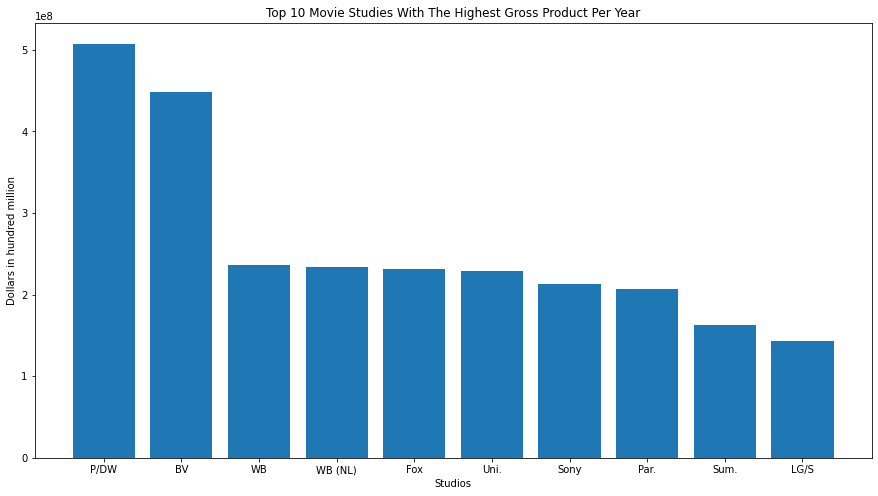

In [188]:
# All missing value rows dropped 
bom_movie_gross_dropped = bom_movie_gross.dropna()
# BOXPLOT OF NUM OF MOVIES PER DIRECTOR
#fig,ax = plt.subplots(figsize=(15,8))
#ax.boxplot(bom_movie_gross_dropped['studio'].value_counts().values, vert=False)

# OBTAIN DESCRIPTIVE STATISTICS OF NUM OF MOVIES PER DIRECTOR
bom_movie_gross_dropped['studio'].value_counts().describe()

# EXTRACT STUDIOS WITH THREE OR MORE MOVIES INTO A LIST
threeplusmoviestudios = [movie for movie in bom_movie_gross_dropped['studio'].value_counts().index if bom_movie_gross_dropped['studio'].value_counts()[movie] >= 3]

# FILTER DATAFRAME SO THAT ONLY MOVIES MADE BY STUDIOS WITH THREE OR MORE MOVIES ARE DISPLAYED
bom_movie_gross_dropped = bom_movie_gross_dropped[bom_movie_gross_dropped['studio'].isin(threeplusmoviestudios)]

# ADD A COLUMN TO DATAFRAME WHICH HAS THE TOTAL GROSS OF EACH MOVIE IN THE DATAFRAME
bom_movie_gross_dropped['total_gross'] = bom_movie_gross_dropped['domestic_gross']  + bom_movie_gross_dropped['foreign_gross'] 

# FIND AVERAGE TOTAL GROSS OF STUDIOS AND EXTRACT THE 10 STUDIOS WITH THE HIGHEST AVERAGE TOTAL GROSS 
bom_movie_gross_filtered = bom_movie_gross_dropped.groupby('studio').mean().sort_values('total_gross', ascending=False).iloc[0:10]

# ONLY KEEP THE STUDIO AND TOTAL GROSS COLUMNS
bom_movie_gross_filtered = bom_movie_gross_filtered['total_gross']
bom_movie_gross_filtered

fig,ax = plt.subplots(figsize=(15,8))
ax.bar(bom_movie_gross_filtered.index, bom_movie_gross_filtered)
ax.set_title("Top 10 Movie Studies With The Highest Gross Product Per Year")
ax.set_xlabel("Studios")
ax.set_ylabel("Dollars in hundred million")

In [143]:
imdb_title_basics_and_title_ratings = imdb_title_basics.merge(imdb_title_ratings, on='tconst', how='inner')
# imdb_title_basics_and_title_ratings_filtered = imdb_title_basics_and_title_ratings[imdb_title_basics_and_title_ratings['averagerating']>8]
# imdb_title_basics_and_title_ratings_sorted = imdb_title_basics_and_title_ratings.sort_values('numvotes', ascending=False)
# imdb_title_basics_and_title_ratings_groupbygenre = imdb_title_basics_and_title_ratings.groupby('genres').mean()
# x = imdb_title_basics_and_title_ratings_groupbygenre.sort_values('averagerating', ascending=False)
# x[x['numvotes'] > 1000]
genre_value_counts = imdb_title_basics_and_title_ratings['genres'].value_counts()
genre_value_counts.describe()

#genre_value_counts.values
# fiveplusmoviegenres = [genre for genre in genre_value_counts.index if genre_value_counts[genre] > 5]
# df = imdb_title_basics_and_title_ratings.copy()
# df[df['genres'].isin(fiveplusmoviegenres)]

# imdb_title_basics_and_title_ratings['genres'].value_counts()


#imdb_title_basics_and_title_ratings_sorted['genres'].value_counts()
# imdb_dict = imdb_title_basics_and_title_ratings_sorted['genres'].value_counts().to_dict()
# imdb_title_basics_and_title_ratings_sorted
# new_dict = {}
# for k,v in imdb_dict.items():
#     temp = k.split(',')
#     for t in temp:
#         if t not in new_dict:
#             new_dict[t] = v
#         else: 
#             new_dict[t] += v

# fig,ax = plt.subplots(figsize=(20,8))
# ax.bar(list(new_dict), list(new_dict.values()))
# ax.set_title("Frequency of Genres in Top 1000 Most Voted movies")
# ax.set_xlabel("Genres")
# ax.set_ylabel("Frequency")

count      923.000000
mean        79.146262
std        569.411161
min          1.000000
25%          2.000000
50%          5.000000
75%         29.000000
max      11612.000000
Name: genres, dtype: float64